<a href="https://colab.research.google.com/github/angelo98-dev/CURE/blob/main/Cure.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install pyclustering

     |████████████████████████████████| 2.6 MB 8.3 MB/s 
  Created wheel for pyclustering: filename=pyclustering-0.10.1.2-py3-none-any.whl size=2395122 sha256=12e560c99367d7e28cb3ec62507420c94523a159bed317a0466c040ba18e4cea
  Stored in directory: /root/.cache/pip/wheels/ea/87/6b/1e0568b5ba9dc6518a25338bae90bd8392f35206bb90bb10f1
Successfully built pyclustering


In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

#Cette partie peut ne pas marcher prsq google permet de faire le montage sur un seul compte

Mounted at /content/drive/


In [ ]:
!apt-get update

Get:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Ign:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Ign:3 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Get:4 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release [696 B]
Hit:5 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:6 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release.gpg [836 B]
Get:7 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Hit:8 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:9 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Get:10 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Get:11 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ Packages [76.0 kB]
Hit:13 http://ppa.launchpad.net/cran/

In [ ]:
!apt-get install openjdk-8-jdk-headless -qq > /dev/null

In [ ]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.0.0-bin-hadoop3.2"

In [ ]:
!wget -q https://archive.apache.org/dist/spark/spark-3.0.0/spark-3.0.0-bin-hadoop3.2.tgz

In [ ]:
!tar xf spark-3.0.0-bin-hadoop3.2.tgz

In [ ]:

!pip install -q findspark

In [ ]:
import findspark
findspark.init()

In [ ]:
# Make a SparkSession
from pyspark import SparkContext
from pyspark.sql import SparkSession
sc = SparkContext('local[*]')
spark = SparkSession(sc)

In [ ]:
from pyclustering.utils import read_sample
from pyclustering.utils import timedcall

from pyclustering.samples.definitions import SIMPLE_SAMPLES
from pyclustering.samples.definitions import FCPS_SAMPLES

from pyclustering.cluster import cluster_visualizer
from pyclustering.cluster.cure import cure

In [ ]:
sample = read_sample(FCPS_SAMPLES.SAMPLE_TETRA)

In [ ]:
dataset = spark.read.option("multiline","true").text('dataset.txt')

In [ ]:
dataset.printSchema()
dataset.show()

root
 |-- value: string (nullable = true)

+--------------+
|         value|
+--------------+
|9.802	10.132	1|
| 10.35	9.768	1|
|10.098	9.988	1|
|   9.73	9.91	1|
| 9.754	10.43	1|
| 9.836	9.902	1|
|10.238	9.866	1|
|  9.53	9.862	1|
| 10.154	9.82	1|
|9.336	10.456	1|
| 9.378	10.21	1|
|9.712	10.264	1|
|9.638	10.208	1|
| 9.518	9.956	1|
| 10.236	9.91	1|
|  9.4	10.086	1|
|10.196	9.746	1|
|10.138	9.828	1|
|10.062	10.26	1|
|10.394	9.984	1|
+--------------+
only showing top 20 rows



In [ ]:
import numpy as np
data = []


In [ ]:
for i in range(dataset.count()):
    x = list(dataset.select('value').toPandas()['value'])[i]
    y = x.split('\t')
    z = [float(i) for i in y]
    data.append(z)
print(data)



    #data.append(list(dataset.select('value').toPandas()['value'])[i])
    #data.map(lambda x: int(x))

[[11.25, 5.05, 1.0], [10.95, 4.7, 1.0], [9.85, 5.8, 1.0], [9.8, 5.75, 1.0], [9.15, 6.8, 1.0], [8.65, 6.6, 1.0], [8.4, 7.5, 1.0], [7.9, 7.75, 1.0], [6.95, 8.7, 1.0], [7.25, 9.75, 1.0], [7.3, 10.25, 1.0], [5.9, 10.7, 1.0], [5.85, 11.8, 1.0], [6.45, 12.05, 1.0], [5.7, 12.95, 1.0], [5.35, 13.45, 1.0], [5.4, 14.65, 1.0], [4.7, 14.85, 1.0], [5.4, 15.4, 1.0], [5.1, 16.25, 1.0], [5.75, 16.7, 1.0], [4.85, 17.65, 1.0], [5.0, 18.0, 1.0], [6.05, 18.0, 1.0], [5.7, 19.45, 1.0], [5.3, 19.55, 1.0], [5.85, 21.25, 1.0], [6.1, 21.35, 1.0], [6.55, 22.15, 1.0], [5.9, 22.8, 1.0], [7.15, 23.7, 1.0], [6.75, 24.25, 1.0], [7.95, 24.65, 1.0], [7.75, 25.3, 1.0], [8.8, 26.05, 1.0], [8.85, 26.95, 1.0], [9.35, 27.45, 1.0], [9.95, 27.1, 1.0], [11.25, 28.2, 1.0], [10.7, 28.55, 1.0], [11.95, 29.45, 1.0], [11.95, 28.65, 1.0], [13.1, 30.05, 1.0], [13.4, 29.3, 1.0], [14.7, 30.2, 1.0], [14.7, 30.6, 1.0], [16.1, 30.4, 1.0], [16.1, 31.05, 1.0], [17.55, 30.8, 1.0], [17.65, 31.75, 1.0], [18.55, 31.6, 1.0], [18.85, 30.6, 1.0], 

In [ ]:
def template_clustering(number_clusters, sample, number_represent_points=10, compression=0.2, draw=True, ccore_flag=True):
    # sample = read_sample(path)
    
    cure_instance = cure(sample, number_clusters, number_represent_points, compression, ccore_flag)
    (ticks, _) = timedcall(cure_instance.process)
    
    clusters = cure_instance.get_clusters()
    representors = cure_instance.get_representors()
    means = cure_instance.get_means()

    # print("Sample: ", path, "\t\tExecution time: ", ticks, "\n")
    print("Execution time: ", ticks, "\n")
    #print([len(cluster) for cluster in clusters])

    if draw is True:
        visualizer = cluster_visualizer()

        visualizer.append_clusters(clusters, sample)

        for cluster_index in range(len(clusters)):
            visualizer.append_cluster_attribute(0, cluster_index, representors[cluster_index], '*', 10)
            visualizer.append_cluster_attribute(0, cluster_index, [ means[cluster_index] ], 'o')

        visualizer.show()

In [ ]:
print(type(data),type(sample))

<class 'list'> <class 'list'>


Execution time:  0.09228823500006911 



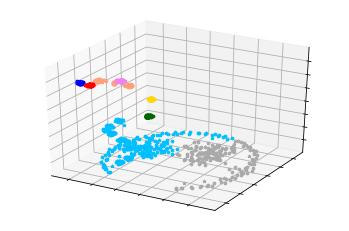

In [ ]:
template_clustering(8, data)